# Transforms vs Other Factors, Checking the CIFAR datasets

In [1]:
from lib_project.notebook import setup_notebook
setup_notebook("../../../")

%load_ext autoreload
%autoreload 2

In [24]:
from IPython.display import display, Markdown as md

import transforms_2d as t2d
from lib_vision.visualization.images import show_dataset_samples

from experiments.transforms_vs_other import results as res_util
from experiments.transforms_vs_other import data as tvo_data

## CIFAR-10

In [19]:
config = tvo_data.TvODataConfig(
    data_type="cifar10",
    config_seed=643,
    num_target_classes=5,
    sampling_seed=643,
    transforms_sampling_seed=584,
    img_size=32,
    n_training_samples=50000,
    n_test_samples=10000,
    n_val_samples=10000,
    batch_size=32,
)
# variation_category = "class_relationship"
# variation_category = "pretraining_samples"
variation_category = "architecture"
data = tvo_data.create_tvo_datasets(
    config,
    variation_category,
    num_ft_samples=1.0,
    normalize=False,
)

target transforms: ['v_flip', 'hue', 'erasing']
disjoint transforms: ['scale', 'invert', 'blur']


In [22]:
# data_module = data.same_transforms_datasets["200"]
# data_module = data.same_transforms_datasets["resnet-18"]
data_module = data.target_datasets["default"]
data_module.setup("train")

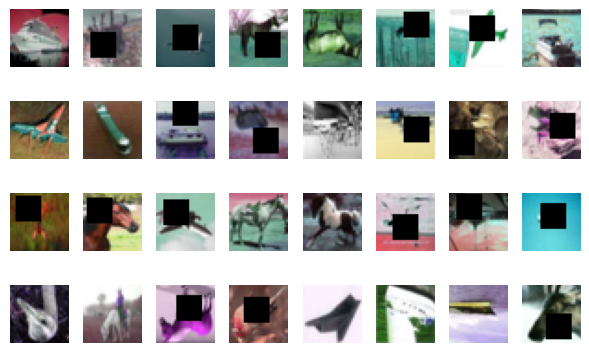

/tmp/ipykernel_2090906/3306272283.py:7: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



In [25]:
fig = show_dataset_samples(
    data_module,
    n_samples=32,
    data_type="train",
    figsize=(6, 4),
)
fig.show()